# NAFF usage illustration

### Note : we follow the sign convention of numpy.fft.
- $\tilde{x}(\omega) = \int x(t) \, e^{-i \omega t} dt$

Therefore, we use $z \equiv x - i p_x$ 

In [1]:
from pImpactR.util import naff
import numpy as np
import matplotlib.pyplot as plt

##### read data

In [2]:
X = [0]*4
X[0] = np.loadtxt('[offsety]no_insert.data')  # time series data (t,x,px,y,py,...)
X[1] = np.loadtxt('[offsety]with_insert.data')
X[2] = np.loadtxt('[offsetx]no_insert.data')
X[3] = np.loadtxt('[offsetx]with_insert.data')

for i in range(2):
    X[i] = X[i][:,3] - 1j*X[i][:,4]  # first two data is about vertical (y,py) oscillation
for i in range(2,4):
    X[i] = X[i][:,1] - 1j*X[i][:,2]  # next two data is about horizontal (x,px) oscillation

##### FFT

In [3]:
FFT = [0]*4    #list of 4 element
T = len(X[0])
T = np.arange(T)/float(T)
for i in range(4):
    FFT[i] = np.fft.fft(X[i])   

##### NAFF

In [4]:
# f2py generated doc string automatically as follows. 
# Actual call is naff not pynaff
print(naff.__doc__)

tune,amplitude,y = pynaff(n_mode,x,[n,window_id,tol])

Wrapper for ``pynaff``.

Parameters
----------
n_mode : input int
x : input rank-1 array('D') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(x)
window_id : input int, optional
    Default: 1
tol : input float, optional
    Default: 1.0d-3/n

Returns
-------
tune : rank-1 array('d') with bounds (n_mode)
amplitude : rank-1 array('D') with bounds (n_mode)
y : rank-1 array('D') with bounds (n)



In [5]:
Tune = [0]*4 
Tune1 = [0]*4 
Amp = [0]*4  
X1 = [0]*4
X2 = [0]*4
FFT1 = [0]*4
FFT2 = [0]*4
for i in range(4):
    Tune[i],Amp[i],X1[i] = naff(1,X[i]) # X1(t) = X(t) - amp*exp(2*pi*i*tune*t) is subtracted data by naff solution
    FFT1[i] = np.fft.fft(X1[i])  # FFT on subtracted data 
    Tune1[i],Amp[i],X2[i] = naff(1,X1[i])
    FFT2[i] = np.fft.fft(X2[i])

##### plot

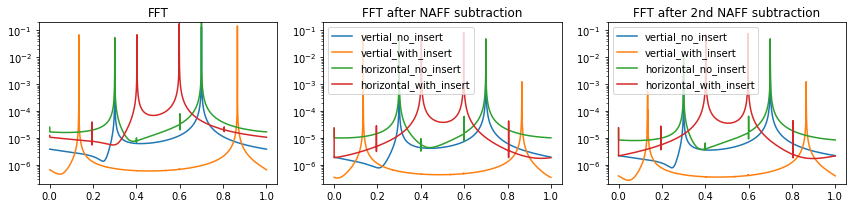

In [6]:
legend = ['vertial_no_insert',
          'vertial_with_insert',
          'horizontal_no_insert',
          'horizontal_with_insert']

plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.title('FFT')
for i in range(4):
    plt.semilogy(T,np.abs(FFT[i]))
plt.ylim(2.0e-7,0.2);
plt.subplot(1,3,2)
plt.title('FFT after NAFF subtraction')
for i in range(4):
    plt.semilogy(T,np.abs(FFT1[i]))
plt.legend(legend)
plt.ylim(2.0e-7,0.2);
plt.subplot(1,3,3)
plt.title('FFT after 2nd NAFF subtraction')
for i in range(4):
    plt.semilogy(T,np.abs(FFT2[i]))
plt.legend(legend)
plt.ylim(2.0e-7,0.2);
plt.tight_layout()
plt.savefig('Rob.fft.data.png',dpi=90)

In [11]:
# each data has two major spectrum alias to each other
print(np.array(Tune))
print(1.0-np.array(Tune1))

[[0.29999134]
 [0.13415562]
 [0.29999592]
 [0.4025125 ]]
[[0.29999134]
 [0.13415562]
 [0.29999592]
 [0.5974979 ]]
